In [1]:
%load_ext autoreload

import time

import struct
import array
import gc

import numpy as np
import matplotlib.pylab as plt

import sys

sys.path.append("../mim_data_utils/src")

from mim_data_utils import DataLogger, DataReader

np.set_printoptions(suppress=True, precision=2)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-e58glowh because the default path (/home/lcao/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from scipy.spatial.transform import Rotation

In [3]:
# reader = DataReader('2021-06-29_09-48.mds')
# reader = DataReader('2021-06-28_12-23-03.mds')
# reader = DataReader('2021-06-29_15-44-18.mds')
# reader = DataReader('2021-06-29_15-45-54.mds')
reader = DataReader('2021-06-29_16-45-28.mds')

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


In [4]:
j = reader.data['joint_positions'][:, 7]

In [5]:
j.shape

(3001,)

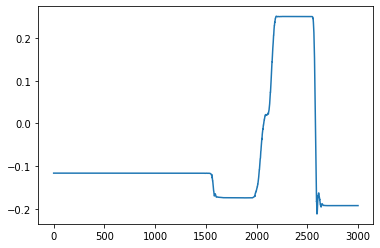

In [6]:
plt.plot(j)

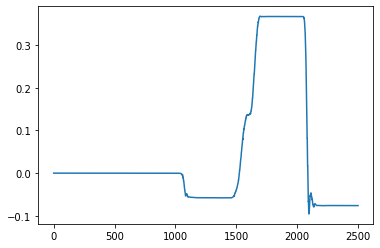

In [23]:
s = slice(500, -1)
j_scaled = (j[s]-j[s.start])
plt.plot(j_scaled)

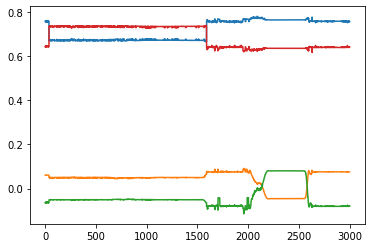

In [25]:
plt.plot(reader.data['vicon_leg_hr'][:,3:7])

In [26]:
Rotation.from_quat((0,0,0,1)).as_euler('xyz')

array([0., 0., 0.])

In [27]:
E = Rotation.from_quat(reader.data['vicon_leg_hr'][:,3:7]).as_euler('xyz')[:,1]

In [28]:
E_all = Rotation.from_quat(reader.data['vicon_leg_hr'][:,3:7]).as_euler('xyz')

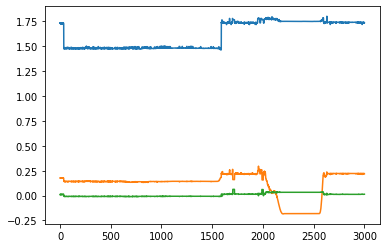

In [12]:
plt.plot(E_all)

In [13]:
Rotation.from_quat(reader.data['vicon_leg_hr'][:,3:7]).as_euler('xyz')[:,1]

array([0.18, 0.18, 0.18, ..., 0.22, 0.22, 0.22])

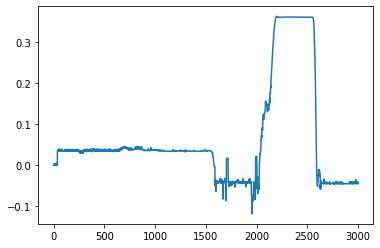

In [14]:
plt.plot(-1*(E-E[0]))

In [15]:
D = (j_scaled-(-1*(E-E[0])))

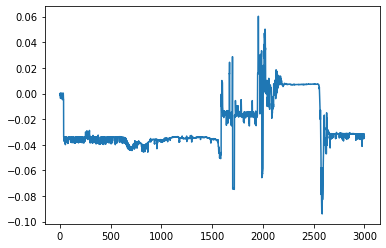

In [16]:
plt.plot(D)

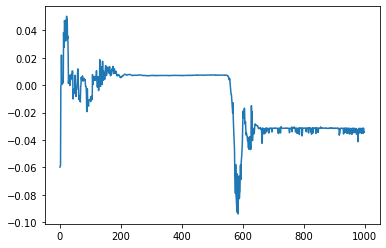

In [17]:
plt.plot(D[2000:3000])

In [18]:
D[2500]

0.007405601182947752